Installing Tensorflow Library

In [2]:
!pip install tensorflow

     -------------------------------------- 276.5/276.5 MB 9.5 MB/s eta 0:00:00
     ---------------------------------------- 126.5/126.5 kB ? eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 15.6 MB/s eta 0:00:00
     --------------------------------------- 24.4/24.4 MB 18.7 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ------------------------------------- 430.4/430.4 kB 26.3 MB/s eta 0:00:00
     ---------------------------------------- 4.3/4.3 MB 18.2 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 13.7 MB/s eta 0:00:00
     ------------------------------------- 440.8/440.8 kB 13.5 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 18.0 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 18.9 MB/s eta 0:00:00
  Using cached wheel-0.41.2-py3-none-any.whl (64 kB)
    


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#  CNN  32 filters with 20 epoch

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

x_train = train_datagen.flow_from_directory("C:/Users/HRIDIMA K AJAY/Downloads/ecg_data/Heart_Disease_Prediction_Using_ECG_Images-main/data/train",target_size=(64, 64),batch_size=32,class_mode='categorical')
x_test = test_datagen.flow_from_directory("C:/Users/HRIDIMA K AJAY/Downloads/ecg_data/Heart_Disease_Prediction_Using_ECG_Images-main/data/test",target_size=(64, 64),batch_size=32,class_mode='categorical')

model = Sequential()

model.add(Convolution2D(32,(3,3),input_shape = (64,64,3),activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units = 128,kernel_initializer = "random_uniform",activation = "relu"))
model.add(Dense(units = 128,kernel_initializer = "random_uniform",activation = "relu"))
model.add(Dense(units = 128,kernel_initializer = "random_uniform",activation = "relu"))
model.add(Dense(units = 128,kernel_initializer = "random_uniform",activation = "relu"))
model.add(Dense(units = 128,kernel_initializer = "random_uniform",activation = "relu"))
model.add(Dense(units = 6,kernel_initializer = "random_uniform",activation = "softmax"))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit_generator(generator=x_train,steps_per_epoch = len(x_train), epochs=20, validation_data=x_test,validation_steps = len(x_test))

Found 15341 images belonging to 6 classes.
Found 6825 images belonging to 6 classes.


C:\Users\HRIDIMA K AJAY\AppData\Local\Temp\ipykernel_1640\1028512771.py:33: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=x_train,steps_per_epoch = len(x_train), epochs=20, validation_data=x_test,validation_steps = len(x_test))


Epoch 1/20
480/480 [==============================] - 86s 175ms/step - loss: 1.4479 - accuracy: 0.4779 - val_loss: 1.6521 - val_accuracy: 0.3193
Epoch 2/20
480/480 [==============================] - 80s 167ms/step - loss: 1.0856 - accuracy: 0.5754 - val_loss: 1.4735 - val_accuracy: 0.4114
Epoch 3/20
480/480 [==============================] - 80s 167ms/step - loss: 0.7003 - accuracy: 0.7202 - val_loss: 1.0154 - val_accuracy: 0.6823
Epoch 4/20
480/480 [==============================] - 84s 174ms/step - loss: 0.3974 - accuracy: 0.8617 - val_loss: 0.7366 - val_accuracy: 0.8180
Epoch 5/20
480/480 [==============================] - 82s 171ms/step - loss: 0.2262 - accuracy: 0.9297 - val_loss: 0.5405 - val_accuracy: 0.8270
Epoch 6/20
480/480 [==============================] - 79s 164ms/step - loss: 0.1624 - accuracy: 0.9515 - val_loss: 0.4970 - val_accuracy: 0.8503
Epoch 7/20
480/480 [==============================] - 80s 167ms/step - loss: 0.1336 - accuracy: 0.9569 - val_loss: 0.5846 - val_ac

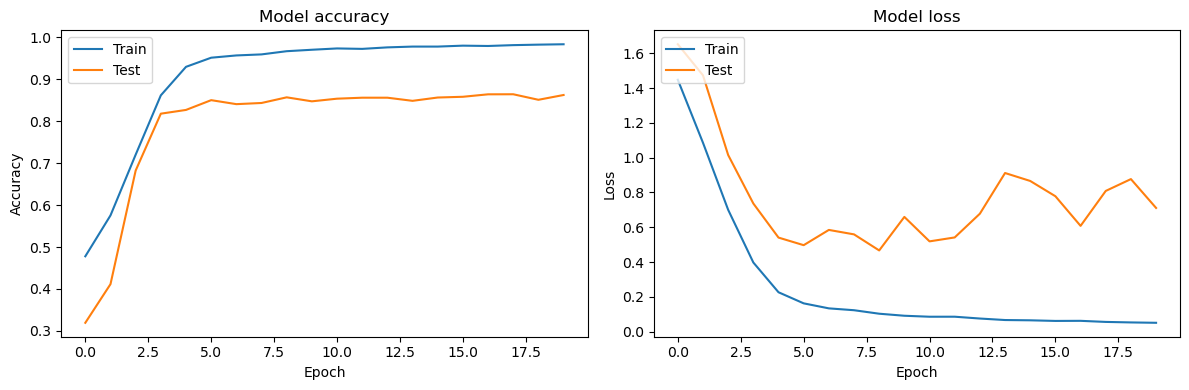

In [7]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()
